In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Функції завантаження та відображення зображення
def load_image(image_path):
    # Завантаження зображення з файлу
    image = cv2.imread(image_path)
    return image
def show_image(image, title='', cmap=None):
    # Відображення зображення
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

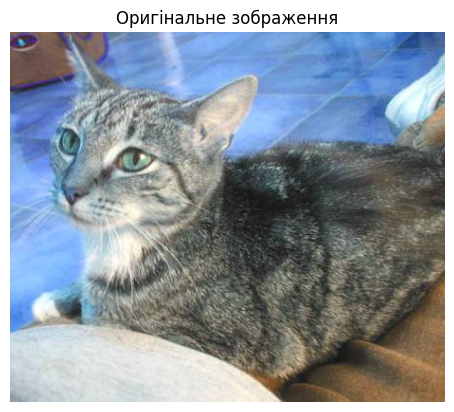

In [5]:
# Приклад застосування функції
image_path = 'cat.jpg'
original_image = load_image(image_path)
show_image(original_image, title='Оригінальне зображення')

## Відображення зображення у відтінках сірого

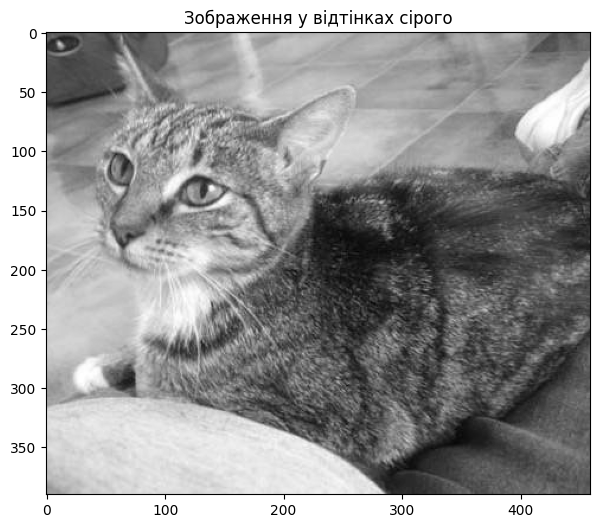

In [22]:
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 6))
plt.imshow(gray, cmap='gray')
plt.title('Зображення у відтінках сірого')
plt.show()

## Застосування фільтра Собеля (горизонталь + вертикаль)

In [18]:
def sobel_filter(gray):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    edges_x = cv2.filter2D(gray, -1, kernel_x)
    edges_y = cv2.filter2D(gray, -1, kernel_y)
    sobel = edges_x + edges_y
    return sobel

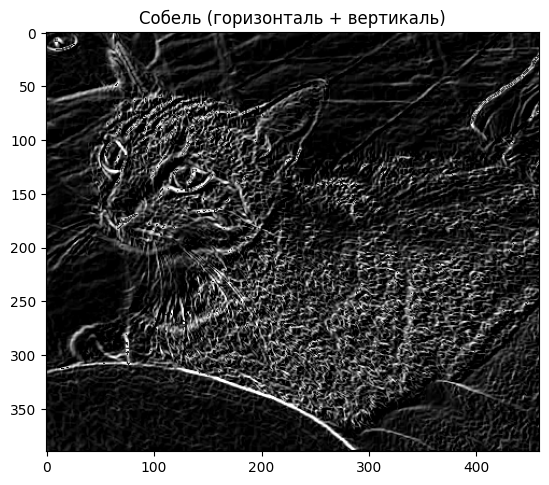

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Собель (горизонталь + вертикаль)')
plt.show()

## Застосування фільтра Canny

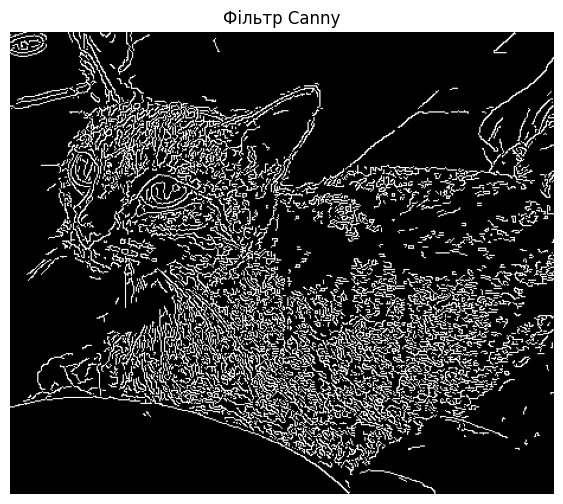

In [25]:
canny_result = cv2.Canny(original_image, 100, 150)
plt.figure(figsize=(14, 6))
show_image(canny_result, title='Фільтр Canny', cmap='gray')
plt.show()

## Застосування фільтра Робертса

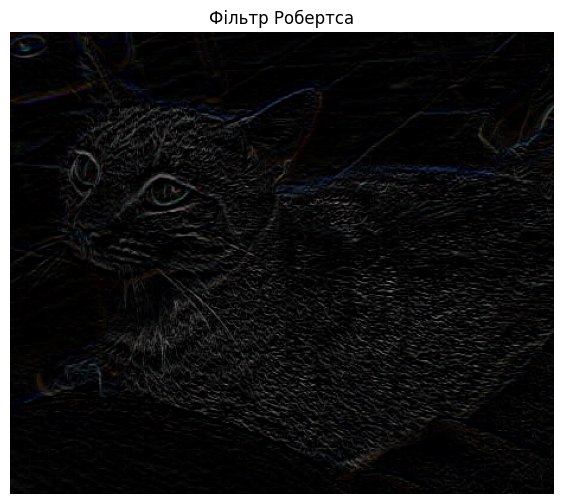

In [35]:
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_result_x = cv2.filter2D(original_image, -1, roberts_kernel_x)
roberts_result_y = cv2.filter2D(original_image, -1, roberts_kernel_y)
roberts_result = np.abs(roberts_result_x) + np.abs(roberts_result_y)
plt.figure(figsize=(12, 6))
show_image(roberts_result, title='Фільтр Робертса', cmap='gray')
plt.show()

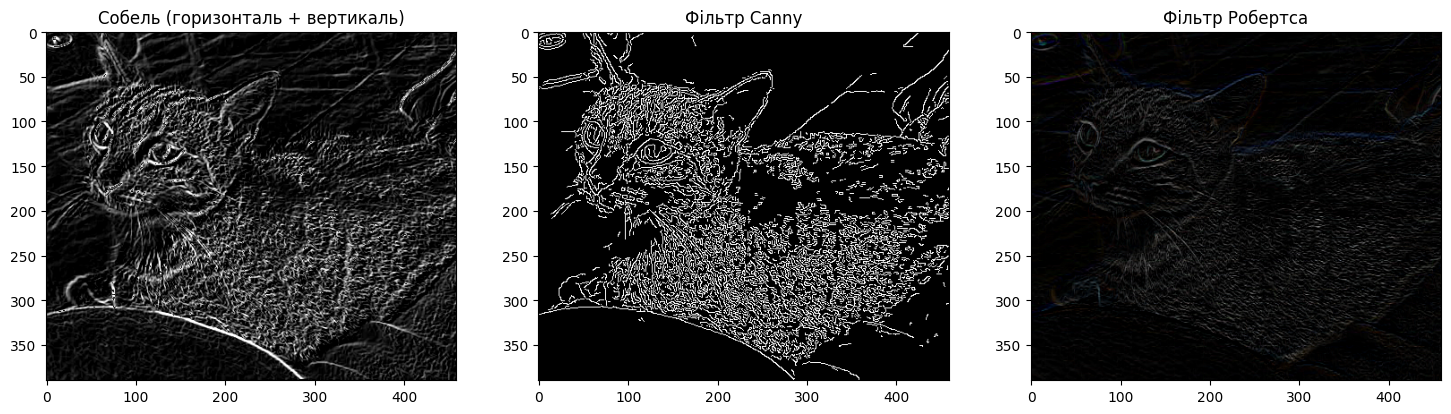

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(sobel_result, cmap='gray')
plt.title('Собель (горизонталь + вертикаль)')

plt.subplot(132)
plt.imshow(canny_result, cmap='gray')
plt.title('Фільтр Canny')

plt.subplot(133)
plt.imshow(roberts_result, cmap='gray')
plt.title('Фільтр Робертса')
plt.show()

Висновок: фільтр Canny найкраще спрацював щодо виділенні кородонів на шерсті кота, в свою чергу фільтр Собеля (горизонталь+ вертикаль) добре спрацював щодо загальних кордонів.